## Load data

In [51]:

import pandas as pd
import numpy as np

#lost code for this ds, but thankfully I had the csv saved. this is the same as the clean_speeddating_with_na.csv ds but I removed all the binned columns and the has_null column
df = pd.read_csv("clean_speeddating_with_na_only_bins.csv", low_memory=False)
df = df.applymap(lambda x: np.nan if x == '?' else x)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#also get rid of decision and decision_o and like because that would give it away. and get rid of the first two unnamed columns (not sure where they came from?)
#df = df.drop(['decision', 'decision_o', 'like'], axis=1)
df.drop(df.columns[[0]], axis=1, inplace=True)
#df.to_csv('clean_speeddating_with_na_no_bins2.csv')


In [52]:
df.shape

(4862, 61)

In [53]:
df.head()

,gender,race,race_o,field,met,match,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
0,female,asian/pacific islander/asian-american,european/caucasian-american,law,0.0,0,[4-6],[2-5],[2-5],[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
1,female,asian/pacific islander/asian-american,european/caucasian-american,law,1.0,0,[0-1],[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
2,female,asian/pacific islander/asian-american,european/caucasian-american,law,0.0,1,[2-3],[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
3,female,asian/pacific islander/asian-american,latino/hispanic american,law,0.0,1,[2-3],[2-5],[2-5],[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],[6-8],[6-8],[9-10],[6-8],[9-10],[6-8],[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
4,female,asian/pacific islander/asian-american,european/caucasian-american,law,0.0,0,[4-6],[2-5],[2-5],[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[9-10],[6-8],[0-5],[6-8],[0-5],[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]


## Feature selection using kbest

#### first pre process

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
#from mlxtend.preprocessing import DenseTransformer
from sklearn.preprocessing import StandardScaler

##first have to preprocess

#make an encoder for all the categorical columns
encoder = OneHotEncoder(handle_unknown='infrequent_if_exist')
ordinalEncoder = OrdinalEncoder()

#standard scale all numeric columns since some are on scale of 0-100 and some from 1-10 and some are binary (like same_race)
std_scaler = StandardScaler()
all_cols = df.columns.tolist()
categorical_cols = ["gender", "race", "race_o", "field"]
ordinal_cols = [col for col in df if col.startswith('d_') and df[col].dtype == 'object']
numeric_cols = [col for col in df if df[col].dtype != 'object']
numeric_cols.remove('match')

#now use a column transformer to do both pre processors on their separate columns
transformer = ColumnTransformer( 
        [('categories', encoder, categorical_cols),
         ('ordinals', ordinalEncoder, ordinal_cols),
        ('numeric', std_scaler, numeric_cols)],
        sparse_threshold=0,
        remainder='drop', verbose_feature_names_out=False)

#### then split ds

In [62]:
#turns out kMeans can't process nans so drop them and try again
df_no_nan = df #df has already dropped na

X2 = df_no_nan.loc[:, df_no_nan.columns != 'match']
y2 = df_no_nan['match']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)


## Balance the training data, but not the test data



In [70]:
y_train2
#df_no_match = X_train2[X_train2['match'] == 0]

#df_matches.shape

#df_no_match = df_no_match.sample(n=816)
#df_matches.shape
#df_final = pd.concat([df_matches, df_no_match])
#df_final.shape

#plt.figure(figsize=(8,4))
#sns.countplot(x='match', data=df_final)

1888    1
182     0
382     0
2594    0
4700    0
4088    1
3488    0
1688    1
706     0
4522    0
3554    0
2247    0
206     0
384     0
1376    0
2884    0
4020    0
4219    0
457     0
3809    0
2986    1
1940    1
4318    0
3688    0
4580    0
4572    0
3031    0
663     0
3249    0
4472    0
3038    0
2626    0
4080    0
768     0
3060    1
2631    0
4084    0
1877    0
3183    0
2372    0
1632    1
1465    0
2272    0
2131    0
2938    0
4367    1
841     1
3887    0
4569    0
3996    0
4749    0
3574    0
4208    0
857     0
4716    0
2281    0
925     0
4348    0
3746    0
2175    0
4170    0
2048    0
2523    0
2443    0
2531    0
1749    1
1586    0
2228    0
3093    0
4673    0
1695    1
1273    1
4486    0
3595    1
1643    0
1658    0
2909    0
3719    0
4727    0
4544    0
687     1
2947    0
3051    0
3562    0
1794    0
3058    0
2433    0
527     0
3103    0
1230    1
2808    0
3081    1
1430    0
2600    0
794     0
2676    1
1687    0
1330    0
2735    0
3389    0


In [30]:
X_train2.head()

,gender,race,race_o,field,met,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
616,female,black/african american,other,law,1.0,[0-1],[0-1],[0-1],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[21-100],[0-15],[16-20],[21-100],[0-15],[0-15],[6-8],[9-10],[9-10],[9-10],[9-10],[6-8],[6-8],[6-8],[9-10],[9-10],[6-8],[0-5],[0-5],[6-8],[9-10],[6-8],[6-8],[0-5],[0-5],[9-10],[9-10],[0-5],[6-8],[6-8],[9-10],[9-10],[9-10],[9-10],[0-0.33],[5-6],[0-3],[3-5],[6-8],[7-10]
936,female,asian/pacific islander/asian-american,european/caucasian-american,psychology,0.0,[0-1],[0-1],[0-1],[21-100],[0-15],[21-100],[0-15],[0-15],[16-20],[9-10],[6-8],[6-8],[6-8],[6-8],[6-8],[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],[6-8],[0-5],[9-10],[9-10],[6-8],[6-8],[6-8],[9-10],[0-5],[9-10],[6-8],[0-5],[0-5],[0-5],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[9-10],[6-8],[6-8],[6-8],[0-5],[6-8],[9-10],[9-10],[-1-0],[0-4],[0-3],[0-2],[6-8],[5-6]
1399,female,black/african american,asian/pacific islander/asian-american,epidemiology,0.0,[2-3],[6-10],[2-5],[21-100],[16-20],[21-100],[16-20],[0-15],[0-15],[0-5],[9-10],[6-8],[6-8],[6-8],[6-8],[16-20],[16-20],[16-20],[16-20],[16-20],[0-15],[6-8],[6-8],[6-8],[6-8],[9-10],[0-5],[6-8],[9-10],[9-10],[9-10],[6-8],[0-5],[6-8],[0-5],[6-8],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[6-8],[0-5],[6-8],[0-5],[9-10],[6-8],[0-5],[0.33-1],[5-6],[0-3],[0-2],[6-8],[5-6]
977,female,european/caucasian-american,latino/hispanic american,mathematics,0.0,[4-6],[6-10],[2-5],[0-15],[0-15],[0-15],[0-15],[21-100],[21-100],[0-5],[6-8],[6-8],[0-5],[0-5],[0-5],[16-20],[16-20],[16-20],[16-20],[16-20],[0-15],[6-8],[9-10],[9-10],[9-10],[6-8],[6-8],[9-10],[9-10],[6-8],[6-8],[0-5],[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],[0-5],[0-5],[6-8],[6-8],[6-8],[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
1258,male,asian/pacific islander/asian-american,european/caucasian-american,electrical engg.,0.0,[2-3],[0-1],[0-1],[21-100],[16-20],[21-100],[21-100],[0-15],[0-15],[0-5],[6-8],[6-8],[6-8],[6-8],[6-8],[21-100],[0-15],[0-15],[0-15],[0-15],[0-15],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],[6-8],[6-8],[6-8],[0-5],[0-5],[6-8],[6-8],[6-8],[6-8],[0-5],[0-5],[0-5],[0-5],[6-8],[0-5],[6-8],[-1-0],[5-6],[0-3],[0-2],[9-10],[5-6]


#### then kbest

In [31]:
transformer.fit(X_train2, y_train2)

feature_selector = SelectKBest(k=10)

X_train_trans2 = transformer.transform(X_train2)

type(X_train_trans2)


X_train_trans_df2 = pd.DataFrame(X_train_trans2, columns = transformer.get_feature_names_out())

feature_selector.fit(X_train_trans_df2, y_train2)

SelectKBest()

In [32]:
X_train_trans_df2.head()

,gender_female,gender_male,race_asian/pacific islander/asian-american,race_black/african american,race_european/caucasian-american,race_latino/hispanic american,race_other,race_o_asian/pacific islander/asian-american,race_o_black/african american,race_o_european/caucasian-american,race_o_latino/hispanic american,race_o_other,field_african-american studies/history,field_american studies [masters],field_anthropology,field_anthropology/education,field_applied maths/econs,field_applied physiology & nutrition,field_architecture,field_art education,field_art history,field_art history/medicine,field_arts administration,field_bilingual education,field_biochemistry,field_biochemistry & molecular biophysics,field_biochemistry/genetics,field_biology,field_biomedical engineering,field_biomedicine,field_biotechnology,field_business,field_business & international affairs,field_business [mba],field_business administration,field_business consulting,field_business school,field_business- mba,field_business/ finance/ real estate,field_business/law,field_business; marketing,field_business; media,field_cell biology,field_chemistry,field_classics,field_climate dynamics,field_clinical psychology,field_cognitive studies in education,field_communications,field_computer science,field_conservation biology,field_consulting,field_counseling psychology,field_creative writing,field_creative writing - nonfiction,field_creative writing [nonfiction],field_curriculum and teaching/giftedness,field_earth and environmental science,field_ecology,field_economics,field_economics and political science,field_economics; english,field_economics; sociology,field_education,field_education leadership - public school administration,field_education policy,field_education- literacy specialist,field_electrical engg.,field_electrical engineering,field_elementary education,field_elementary education - preservice,field_elementary/childhood education [ma],field_engineering,field_english,field_english education,field_environmental engineering,field_epidemiology,field_film,field_finanace,field_finance,field_finance&economics,field_finance/economics,field_financial engineering,field_financial math,field_french,field_fundraising management,field_general management/finance,field_genetics,field_german literature,field_gs postbacc premed,field_gsas,field_history,field_history of religion,field_human rights,field_human rights: middle east,field_industrial engineering,field_industrial engineering/operations research,field_instructional media and technology,field_instructional tech & media,field_intellectual property law,field_international affairs,field_international affairs - economic development,field_international affairs and public health,field_international affairs/finance,field_international affairs/international finance,field_international business,field_international development,field_international educational development,field_international politics,field_international relations,field_international security policy - sipa,field_intrernational affairs,field_journalism,field_law,field_law and english literature [j.d./ph.d.],field_law and social work,field_law/business,field_ma in quantitative methods,field_ma science education,field_ma teaching social studies,field_marine geophysics,field_marketing,field_master in public administration,field_masters in public administration,field_masters of industrial engineering,field_masters of social work,field_math,field_math education,field_math of finance,field_mathematical finance,field_mathematics,field_mba,field_mba - private equity / real estate,field_mba / master of international affairs [sipa],field_mba finance,field_mechanical engineering,field_medical informatics,field_medicine,field_medicine and biochemistry,field_mfa -film,field_mfa acting program,field_mfa writing,field_microbiology,field_modern chinese literature,field_molecular biology,field_museum anthropology,field_music education,field_neuroscience,field_neurosciences/stem cells,

<Axes: >

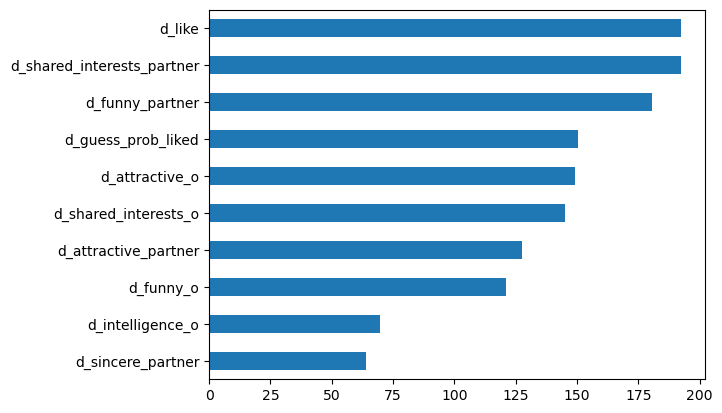

In [33]:
X_train_trans_df2.columns[feature_selector.get_support()]

top_feature_importance_scores = feature_selector.scores_[feature_selector.get_support()]

top_feature_importance_names = X_train_trans_df2.columns[feature_selector.get_support()]

pd.Series(top_feature_importance_scores, index=top_feature_importance_names).sort_values(ascending=True).plot(kind='barh')

In [34]:
top_feature_importance_scores

array([149.20720204,  69.79219912, 121.0442481 , 145.17765542,
       127.4131869 ,  64.00531575, 180.50154256, 192.28920035,
       192.58834279, 150.22769677])

## moving forward I'll just use these top 10 features

In [35]:
top10 = top_feature_importance_names.to_list()
top10
#top10 = ['funny_o', 'funny_partner', 'attractive_partner', 'guess_prob_liked', 'shared_interests_partner', 'attractive_o', 'sinsere_o', 'intelligence_o', 'intelligence_partner']

['d_attractive_o',
 'd_intelligence_o',
 'd_funny_o',
 'd_shared_interests_o',
 'd_attractive_partner',
 'd_sincere_partner',
 'd_funny_partner',
 'd_shared_interests_partner',
 'd_like',
 'd_guess_prob_liked']

In [36]:
#resplit the data using only the top features. still had to use the non-nan data for the models below
X_top10 = df_no_nan[top10]
y_top10 = df_no_nan['match']

X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(X_top10, y_top10, random_state=0)

X_train_oe = ordinalEncoder.fit_transform(X_train_top10)
X_test_oe = ordinalEncoder.transform(X_test_top10)

In [37]:
X_train_top10.head()

,d_attractive_o,d_intelligence_o,d_funny_o,d_shared_interests_o,d_attractive_partner,d_sincere_partner,d_funny_partner,d_shared_interests_partner,d_like,d_guess_prob_liked
616,[9-10],[9-10],[9-10],[9-10],[6-8],[6-8],[9-10],[6-8],[6-8],[7-10]
936,[9-10],[6-8],[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],[6-8],[5-6]
1399,[0-5],[6-8],[6-8],[6-8],[0-5],[6-8],[9-10],[6-8],[6-8],[5-6]
977,[0-5],[6-8],[0-5],[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],[5-6]
1258,[0-5],[6-8],[6-8],[6-8],[9-10],[9-10],[9-10],[9-10],[9-10],[5-6]


## Try ensemble to see which models work the best

In [38]:
from sklearn.naive_bayes import BernoulliNB #choosing Bernoulli since have binary outcome
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#three models that might work well. not using hyperparameters yet
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = BernoulliNB()

#ensemble
eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3)],
    voting='hard')

#find accuracies using cross validated scores
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_oe, y_train_top10, scoring='accuracy', cv=5) #using the split dataset without nans
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.74 (+/- 0.01) [Logistic Regression]
Accuracy: 0.72 (+/- 0.02) [Random Forest]
Accuracy: 0.75 (+/- 0.03) [naive Bayes]
Accuracy: 0.75 (+/- 0.03) [Ensemble]


## In the case of using the binned columns, logistic regression comes out on top 

#### first set up preprocessor and model

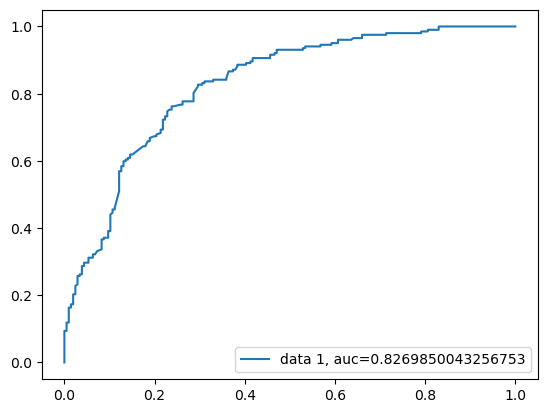

In [49]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

logModel = LogisticRegression(class_weight='balanced')
logModel.fit(X_train_oe, y_train_top10)
y_pred = logModel.predict(X_test_oe)
y_pred_proba = logModel.predict_proba(X_test_oe)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
metrics.classification_report(y_test_top10, y_pred)


'              precision    recall  f1-score   support\n\n           0       0.77      0.74      0.75       206\n           1       0.75      0.77      0.76       202\n\n    accuracy                           0.75       408\n   macro avg       0.76      0.76      0.75       408\nweighted avg       0.76      0.75      0.75       408\n'

## We can see that our model has 77% precision when there is no match vs a 75% precision for matching.

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_top10,predictions_log)


0.7549019607843137

In [20]:
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

roc_auc_score(y_train_top10, logModel.decision_function(X_train_oe))

0.8183091258610562

#### confusion matrix

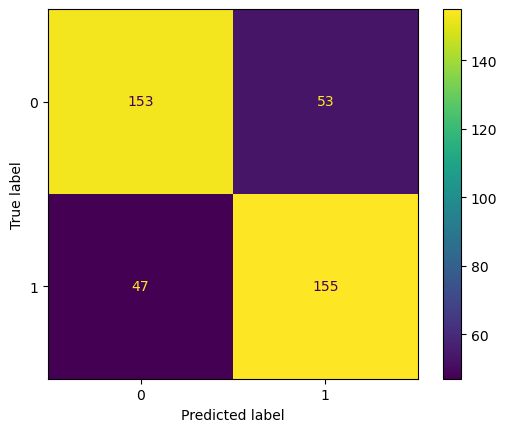

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_top10, predictions_log)).plot()

## not many people match in general. does not do a good job at identifying who matches. will retry with all features rather than top 10

#### transform data and find which model works best

In [23]:
#first transform the data since have categorical and numeric data types. use transformer from before
X_train_trans2 = transformer.fit_transform(X_train2)

#find which model works best from all features (from non-nan ds)
for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_train_trans2, y_train2, scoring='accuracy', cv=5) 
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))



/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Accuracy: 0.85 (+/- 0.01) [Logistic Regression]
Accuracy: 0.85 (+/- 0.01) [Random Forest]
Accuracy: 0.80 (+/- 0.01) [naive Bayes]


/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Accuracy: 0.85 (+/- 0.01) [Ensemble]


#### ensemble does best. set up pipeline then find hyperparameters

In [24]:
classification_pipeline2 = Pipeline([('transformer', transformer_top10),
                                    ('ensemble', VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('bnb', clf3)], voting='hard'))])

In [25]:
#find names of parameters
classification_pipeline2.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    ['funny_o', 'funny_partner',
                                     'attractive_partner', 'guess_prob_liked',
                                     'shared_interests_partner', 'attractive_o',
                                     'sinsere_o', 'intelligence_o',
                                     'intelligence_partner'])],
                     verbose_feature_names_out=False)),
  ('ensemble',
   VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                                ('rf', RandomForestClassifier(random_state=1)),
                                ('bnb', BernoulliNB())]))],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  ['funny_o', 'funny_partner',
                                   'attractive_partner', 'guess_prob_liked',
          

In [26]:
parameters2 = {
    "ensemble__lr__penalty": ("None", "l2", "l1", "elasticnet"),
    "ensemble__rf__max_depth": range(3,30),
    'ensemble__rf__min_samples_leaf': range(2, 10),
    "ensemble__bnb__alpha": (0.0, 1.0)
}

In [27]:
#had to do grid search this time since needed to spell out the logistic regression parameter options
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(classification_pipeline2, parameters2, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train2, y_train2)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/U

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         ['funny_o',
                                                                          'funny_partner',
                                                                          'attractive_partner',
                                                                          'guess_prob_liked',
                                                                          'shared_interests_partner',
                                                                          'attractive_o',
                                                                          'sinsere_o',
                                                                          'intelligence_o',
                                                                          'intelligence_partner'])],
                                                          verbose_feature_names_out=False)),
                                       ('ensemble',
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression(random_state=1)),
                                                                     ('rf',
                                                                      RandomForestClassifier(random_state=1)),
                                                                     ('bnb',
                                                                      BernoulliNB())]))]),
             n_jobs=-1,
             param_grid={'ensemble__bnb__alpha': (0.0, 1.0),
                         'ensemble__lr__penalty': ('None', 'l2', 'l1',
                                                   'elasticnet'),
                         'ensemble__rf__max_depth': range(3, 30),
                         'ensemble__rf__min_samples_leaf': range(2, 10)},
             verbose=1)

In [28]:
grid_search.best_score_


0.8535405837123674

In [29]:
grid_search.best_estimator_
#ensemble__lr__penalty='None'
#ensemble__rf__max_depth=10,
#ensemble__rf__min_samples_leaf=2
#ensemble__bnb__alpha=0.0

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['funny_o', 'funny_partner',
                                                   'attractive_partner',
                                                   'guess_prob_liked',
                                                   'shared_interests_partner',
                                                   'attractive_o', 'sinsere_o',
                                                   'intelligence_o',
                                                   'intelligence_partner'])],
                                   verbose_feature_names_out=False)),
                ('ensemble',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=1)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=14,
                                                                      min_samples_leaf=6,
                                                                      random_state=1)),
                                              ('bnb',
                                               BernoulliNB(alpha=0.0))]))])

#### repeat for test data and find accuracy

In [31]:
#transform test data
X_test_trans2 = transformer.fit_transform(X_test2)

#convert to df
X_test_trans_df2 = pd.DataFrame(X_test_trans2, columns = transformer.get_feature_names_out(),
                                index = X_test2.index)

#fit and predict
grid_search.fit(X_train_trans_df2, y_train2)
grid_search.predict(X_test_trans_df2)


Fitting 3 folds for each of 1728 candidates, totalling 5184 fits


/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/U

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
#find accuracy
y_pred2 = grid_search.predict(X_test_trans_df2)
sum(y_pred2 == y_test2) / len(y_test2)

0.84375

#### confusion matrix

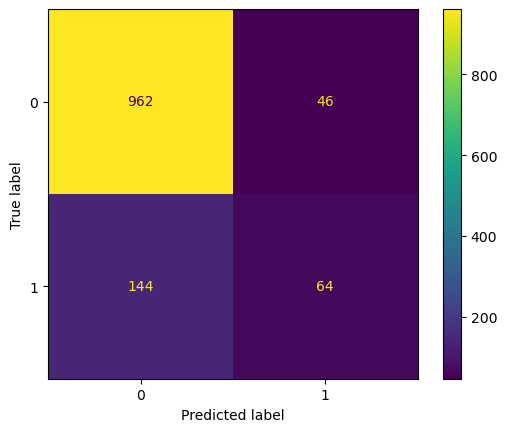

In [33]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test2, y_pred2), display_labels=grid_search.classes_).plot()

## same problem as before, it just doesn't do a good job at identifying matches since there are so few. will try weighing. will use the top10 features since that had a higher accuracy

In [34]:
classification_pipeline_balanced = Pipeline([('transformer', transformer_top10),
                                    ('RF_model', RandomForestClassifier(max_depth=23, min_impurity_decrease=0.0008982385551574712, min_samples_leaf=9, class_weight='balanced'))])

In [35]:
scores3 = cross_val_score(classification_pipeline_balanced, X_train_top10, y_train_top10, cv=5)
print(scores3.mean(), '\t', scores3.std())

#goes down to 80% when balanced weights

0.7731788714132702 	 0.01346325209526529


In [36]:
#fit and predict
classification_pipeline_balanced.fit(X_train_top10, y_train_top10)
classification_pipeline_balanced.predict(X_test_top10)

array([0, 0, 1, ..., 0, 0, 1])

In [37]:
#find accuracy
y_pred3 = classification_pipeline_balanced.predict(X_test_top10)
sum(y_pred3 == y_test_top10) / len(y_test_top10)



0.7491776315789473

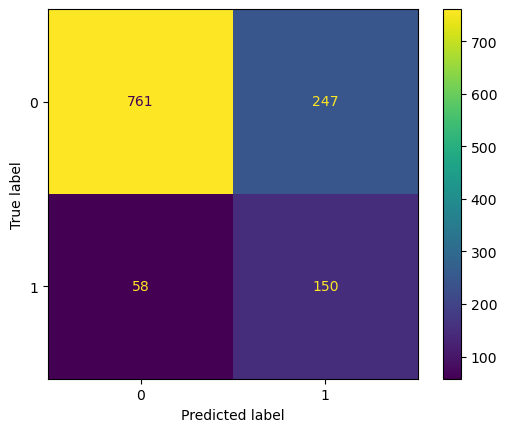

In [38]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_top10, y_pred3), display_labels=classification_pipeline_balanced.classes_).plot()

#### balanced weights does predict matches much better, but it also misses non matches more

# PCA

In [39]:
X_train2.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,guess_prob_liked,met
3750,female,27.0,24.0,3,asian/pacific islander/asian-american,other,0,4.0,4.0,genetics,20.0,20.0,25.0,25.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,19.0,20.0,19.0,14.0,13.0,15.0,6.0,9.0,7.0,9.0,6.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,6.0,7.0,9.0,5.0,5.0,6.0,2.0,3.0,9.0,6.0,7.0,7.0,9.0,9.0,5.0,3.0,-0.18,6.0,4.0,4.0,0.0
310,female,22.0,28.0,6,latino/hispanic american,european/caucasian-american,0,1.0,5.0,speech language pathology,40.0,20.0,20.0,20.0,0.0,0.0,9.0,9.0,8.0,9.0,8.0,7.0,17.0,10.0,18.0,20.0,25.0,10.0,6.0,6.0,7.0,7.0,7.0,2.0,4.0,7.0,3.0,6.0,2.0,7.0,6.0,8.0,8.0,7.0,6.0,8.0,7.0,8.0,8.0,5.0,5.0,5.0,5.0,7.0,7.0,8.0,-0.06,5.0,1.0,2.0,0.0
640,male,30.0,27.0,3,european/caucasian-american,european/caucasian-american,1,2.0,2.0,finance&economics,10.0,20.0,20.0,15.0,20.0,15.0,5.0,7.0,7.0,7.0,7.0,7.0,20.0,20.0,25.0,25.0,5.0,5.0,8.0,7.0,9.0,9.0,3.0,6.0,6.0,6.0,5.0,6.0,4.0,6.0,7.0,2.0,8.0,7.0,6.0,3.0,7.0,4.0,7.0,4.0,5.0,8.0,8.0,7.0,2.0,1.0,0.04,8.0,5.0,6.0,0.0
4685,male,25.0,33.0,8,european/caucasian-american,european/caucasian-american,1,7.0,8.0,computer science,20.0,25.0,25.0,10.0,15.0,5.0,7.0,5.0,7.0,3.0,6.0,2.0,24.0,15.0,20.0,20.0,8.0,13.0,7.0,6.0,8.0,7.0,4.0,6.0,8.0,7.0,5.0,5.0,5.0,2.0,2.0,3.0,7.0,6.0,6.0,3.0,8.0,5.0,9.0,8.0,7.0,9.0,5.0,6.0,5.0,3.0,0.17,6.0,2.0,4.0,0.0
8124,male,23.0,26.0,3,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,2.0,industrial engineering/operations research,40.0,5.0,30.0,15.0,5.0,5.0,4.0,4.0,2.0,1.0,5.0,5.0,40.0,30.0,0.0,20.0,0.0,10.0,8.0,9.0,9.0,9.0,8.0,8.0,8.0,10.0,7.0,6.0,5.0,10.0,10.0,7.0,8.0,3.0,5.0,4.0,3.0,8.0,3.0,10.0,5.0,10.0,10.0,9.0,9.0,3.0,-0.10,7.0,1.0,5.0,0.0


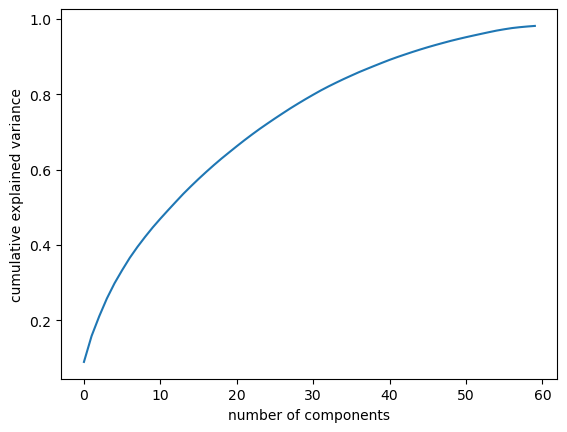

In [40]:
from sklearn.decomposition import PCA

pca = Pipeline([('transformer', transformer),
                         ('pca', PCA(60))]) #first start with most of the features

pca.fit(X_train2) #pca can't handle nan entries either


pca['pca']

import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca['pca'].explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [41]:
pca_pipeline = Pipeline([('transformer', transformer),
                         ('scaler', StandardScaler()),
                         ('pca', PCA(25)),
                         ('RF', RandomForestClassifier())]) #use RF since performed best before - but should we use this one or ensemble?

pca_pipeline.fit(X_train2, y_train2)

y_pred = pca_pipeline.predict(X_test2)

sum(y_pred == y_test2)/len(y_test2)

#86% accurate still with PCA and RF (unoptimized)

0.850328947368421

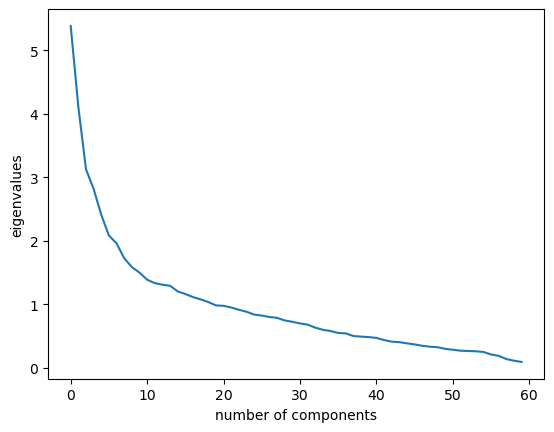

In [42]:
plt.plot(pca.steps[1][1].explained_variance_)
plt.xlabel('number of components')
plt.ylabel('eigenvalues');

/var/folders/f_/6qh4fqhd4sdg10xsh3wzc6fc0000gn/T/ipykernel_95788/3814541780.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent_r', 2))


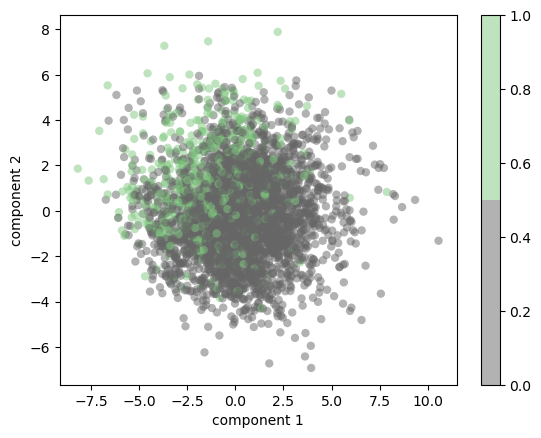

In [43]:
pca2 = Pipeline([('transformer', transformer),
                         ('pca', PCA(2))]) #project to 2 dimensions
projected = pca2.fit_transform(X_train2)

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train2, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent_r', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

KMeans

In [57]:
df_no_nan.head()

,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,guess_prob_liked,met,match
0,female,21.0,27.0,6,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,6.0,0.0,0
1,female,21.0,22.0,1,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,5.0,1.0,0
3,female,21.0,23.0,2,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,6.0,0.0,1
4,female,21.0,24.0,3,asian/pacific islander/asian-american,latino/hispanic american,0,2.0,4.0,law,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,0.0,1
5,female,21.0,25.0,4,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,50.0,0.0,30.0,10.0,0.0,10.0,7.0,7.0,8.0,8.0,7.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,4.0,9.0,7.0,4.0,6.0,4.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.25,3.0,4.0,5.0,0.0,0


In [59]:
from sklearn.preprocessing import LabelEncoder

df_kmeans = df_no_nan.copy()

number = LabelEncoder()
df_kmeans["gender"] = number.fit_transform(df_kmeans["gender"].astype('str'))
df_kmeans["race"] = number.fit_transform(df_kmeans["race"].astype('str'))
df_kmeans["race_o"] = number.fit_transform(df_kmeans["race_o"].astype('str'))
df_kmeans["field"] = number.fit_transform(df_kmeans["field"].astype('str'))

df_kmeans.isna().sum()



gender                           0
age                              0
age_o                            0
d_age                            0
race                             0
race_o                           0
samerace                         0
importance_same_race             0
importance_same_religion         0
field                            0
pref_o_attractive                0
pref_o_sincere                   0
pref_o_intelligence              0
pref_o_funny                     0
pref_o_ambitious                 0
pref_o_shared_interests          0
attractive_o                     0
sinsere_o                        0
intelligence_o                   0
funny_o                          0
ambitous_o                       0
shared_interests_o               0
attractive_important             0
sincere_important                0
intellicence_important           0
funny_important                  0
ambtition_important              0
shared_interests_important       0
attractive          

In [60]:
df_onehot = df_kmeans.copy()
df_onehot = pd.get_dummies(df_onehot, columns = ['gender','race','race_o','field'], prefix = ['gender','race','race_o','field'])

In [61]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
onehot_fit_trans = SS.fit_transform(df_onehot)

onehot_fit_trans

array([[-1.47427058,  0.23332291,  0.82941822, ..., -0.04306417,
        -0.18859946, -0.0453983 ],
       [-1.47427058, -1.21068927, -0.86524953, ..., -0.04306417,
        -0.18859946, -0.0453983 ],
       [-1.47427058, -0.92188684, -0.52631598, ..., -0.04306417,
        -0.18859946, -0.0453983 ],
       ...,
       [-0.34198979, -1.21068927, -0.18738243, ..., -0.04306417,
        -0.18859946, -0.0453983 ],
       [-0.34198979,  0.23332291, -0.52631598, ..., -0.04306417,
        -0.18859946, -0.0453983 ],
       [-0.34198979, -1.21068927, -0.18738243, ..., -0.04306417,
        -0.18859946, -0.0453983 ]])

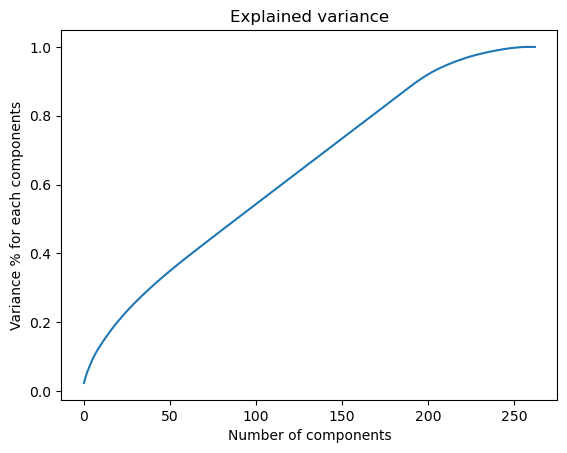

In [62]:
pca=PCA().fit(onehot_fit_trans)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance % for each components')
plt.title('Explained variance')
plt.show()

In [64]:
pca=PCA(n_components=200)
pca.fit(onehot_fit_trans)
x_pca=pca.transform(onehot_fit_trans)

/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

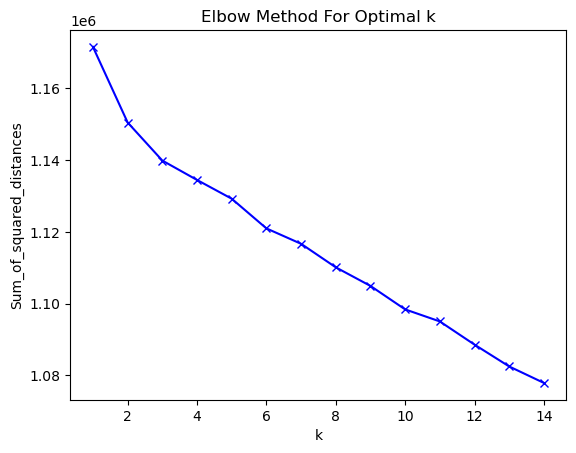

In [66]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_pca)
    Sum_of_squared_distances.append(km.inertia_)
#Visualing the plot
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


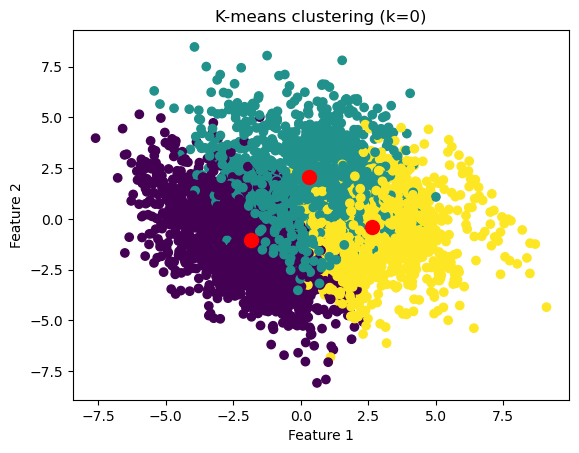

In [83]:
# Fit and plot the data for each k value
#for k in k_range:
kmeans = KMeans(n_clusters=3, \
                init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 1], \
            s=100, c='red')
plt.title('K-means clustering (k={})'.format(k))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/Users/christinalawrence/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


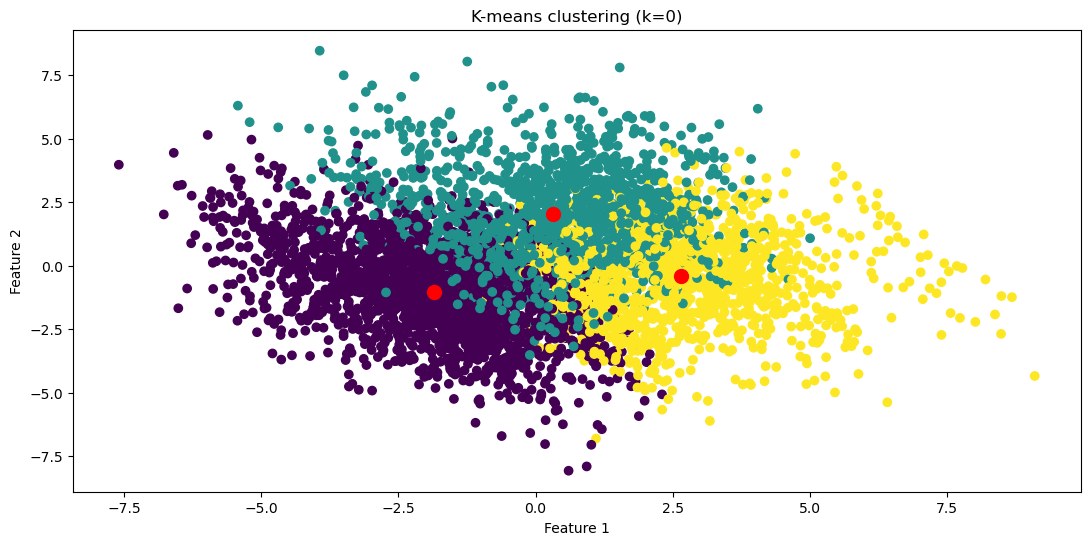

In [82]:
import matplotlib.pyplot as plt
 
# Create a range of values for k
k_range = range(3)
 
# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
#for k in k_range:
kmeans = KMeans(n_clusters=3, \
                init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x_pca)
inertia_values.append(kmeans.inertia_)
plt.figure(figsize=(13,6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0],\
            kmeans.cluster_centers_[:, 1], \
            s=100, c='red')
plt.title('K-means clustering (k={})'.format(k))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [85]:
kmeans

KMeans(n_clusters=3, random_state=42)